In [1]:
import pandas as pd

def read_pubmed_file(file_path):
    articles = []
    with open(file_path, 'r', encoding='utf-8') as f:
        article = []
        for line in f:
            line = line.strip()
            if line.startswith("###"):
                if article:
                    articles.append(article)
                    article = []
            else:
                if line:
                    label, text = line.split("\t", 1)
                    article.append({"label": label, "text": text})
        if article:
            articles.append(article)
    return articles

train_articles = read_pubmed_file("../data/PubMed_200k_RCT/train.txt")
dev_articles = read_pubmed_file("../data/PubMed_200k_RCT/dev.txt")
test_articles = read_pubmed_file("../data/PubMed_200k_RCT/test.txt")



In [ ]:

print(f"Nombre d'articles train: {len(train_articles)}")
print(f"Nombre d'articles dev: {len(dev_articles)}")
print(f"Nombre d'articles test: {len(test_articles)}")

# Compter le nombre total de phrases dans train
num_sentences = sum(len(article) for article in train_articles)
print(f"Nombre total de phrases dans train: {num_sentences}")


Nombre d'articles train: 190654
Nombre d'articles dev: 2500
Nombre d'articles test: 2500
Nombre total de phrases dans train: 2211861


In [ ]:

from collections import Counter

label_counts = Counter()
for article in train_articles:
    for sentence in article:
        label_counts[sentence['label']] += 1

print(label_counts)

Counter({'RESULTS': 766271, 'METHODS': 722586, 'CONCLUSIONS': 339714, 'BACKGROUND': 196689, 'OBJECTIVE': 186601})


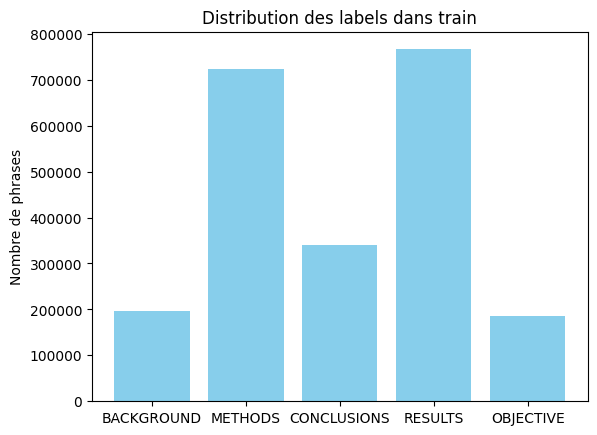

In [8]:
import matplotlib.pyplot as plt

plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.title("Distribution des labels dans train")
plt.ylabel("Nombre de phrases")
plt.show()


In [ ]:
for sentence in train_articles[0]:
    print(f"{sentence['label']}: {sentence['text']}\n")


BACKGROUND: The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .

BACKGROUND: This paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .

METHODS: This study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .

METHODS: The intervention group will participate in the online group program ` Positive Outlook ' .

METHODS: The program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .

METHODS: Participants will access the program for a minimum of 90 minutes per week over seve

In [9]:
sections = {}
for sentence in train_articles[0]:
    sections.setdefault(sentence['label'], []).append(sentence['text'])

for label, texts in sections.items():
    print(f"{label}:\n{' '.join(texts)}\n")


BACKGROUND:
The emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments . This paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV . ACTRN12612000642886 .

METHODS:
This study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group . The intervention group will participate in the online group program ` Positive Outlook ' . The program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life . Participants will access the program for a minimum of 90 minutes per week over seven weeks . Primary out